<a href="https://colab.research.google.com/github/Gunjit2023/Data-Analyst/blob/main/Final%20Graded%20Assignment%20Part%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 #Import Primary Modules:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium

Importing Data

In [33]:
# from js import fetch
# import io

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"
# resp = await fetch(URL)
# text = io.BytesIO((await resp.arrayBuffer()).to_py())
import pandas as pd
df = pd.read_csv(URL)
print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [ ]:
df.describe()

,Year,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales
count,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000
mean,2001.500000,0.214015,101.140170,0.575795,24964.991956,3067.456439,6.064394,40.073903,-0.242001,2.453977,2352.718068
std,12.710467,0.410526,10.601154,0.454477,4888.073433,1139.564637,1.968350,16.249714,0.861268,1.119019,1645.321284
min,1980.000000,0.000000,73.900000,0.000000,8793.663000,1009.000000,3.000000,12.508000,-4.227601,1.000000,102.000000
25%,1990.750000,0.000000,94.035000,0.250000,21453.300500,2083.500000,4.000000,27.237500,-0.574049,1.600000,793.950000
50%,2001.500000,0.000000,100.740000,0.500000,25038.691500,3072.000000,6.000000,39.214500,-0.013162,2.300000,2182.600000
75%,2012.250000,0.000000,108.240000,0.750000,28131.684750,4067.250000,8.000000,53.506500,0.388932,2.900000,3614.800000
max,2023.000000,1.000000,131.670000,1.500000,44263.657000,4983.000000,9.000000,70.374000,0.815074,6.000000,21147.000000


In [34]:
df.columns

Index(['Date', 'Year', 'Month', 'Recession', 'Consumer_Confidence',
       'Seasonality_Weight', 'Price', 'Advertising_Expenditure', 'Competition',
       'GDP', 'Growth_Rate', 'unemployment_rate', 'Automobile_Sales',
       'Vehicle_Type', 'City'],
      dtype='object')

TASK 1.1: Develop a Line chart using the functionality of pandas to show how automobile sales fluctuate from year to year

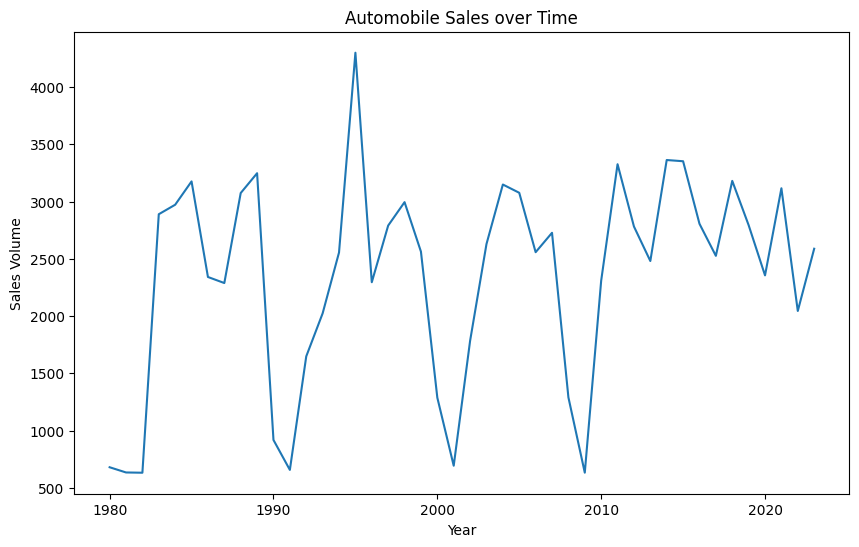

In [35]:
#create data for plotting
df_line = df.groupby(df['Year'])['Automobile_Sales'].mean()
#create figure
plt.figure(figsize=(10, 6))
df_line.plot(kind = 'line')
plt.xlabel('Year')
plt.ylabel('Sales Volume')
plt.title('Automobile Sales over Time')
plt.show()

Include the following on the plot
ticks on x- axis with all the years, to identify the years of recession
annotation for at least two years of recession
Title as Automobile Sales during Recession

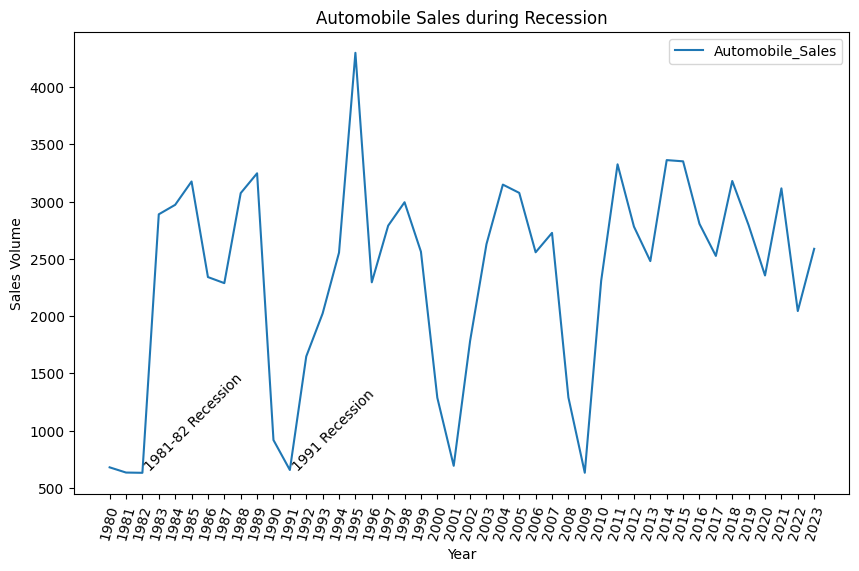

In [36]:
plt.figure(figsize=(10, 6))
df_line = df.groupby(df['Year'])['Automobile_Sales'].mean()
#create figure
df_line.plot(kind = 'line')
plt.xticks(list(range(1980,2024)), rotation = 75)
plt.xlabel('Year')
plt.ylabel('Sales Volume')
plt.title('Automobile Sales during Recession')
plt.text(1982, 650, '1981-82 Recession', rotation = 45)
plt.text(1991, 650, '1991 Recession' , rotation = 45)
plt.legend()
plt.show()

TASK 1.2: Plot different lines for categories of vehicle type and analyse the trend to answer the question Is there a noticeable difference in sales trends between different vehicle types during recession periods?

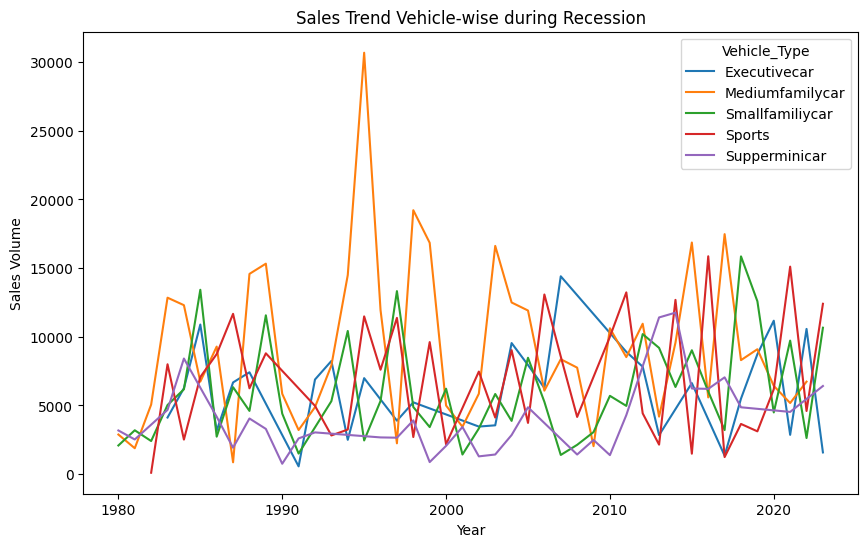

In [37]:
plt.figure(figsize=(10, 6))
df_Mline = df.groupby(['Year','Vehicle_Type'], as_index=False)['Automobile_Sales'].sum()
df_Mline.set_index('Year', inplace=True)
df_Mline = df_Mline.groupby(['Vehicle_Type'])['Automobile_Sales']
df_Mline.plot(kind='line')
plt.xlabel('Year')
plt.ylabel('Sales Volume')
plt.title('Sales Trend Vehicle-wise during Recession')
plt.legend(title = 'Vehicle_Type')
plt.show()

From the above plot, what insights have you gained on the sales of various vehicle types?
Type in your answer below:


​
**Inference**: From this plot, we can understand that during recession period, the sales for 'Sports type vehicles' declined because of the high cost of the vehicle.
while sales of the superminicar and smallfamilycar increased.


TASK 1.3: Use the functionality of Seaborn Library to create a visualization to compare the sales trend per vehicle type for a recession period with a non-recession period.

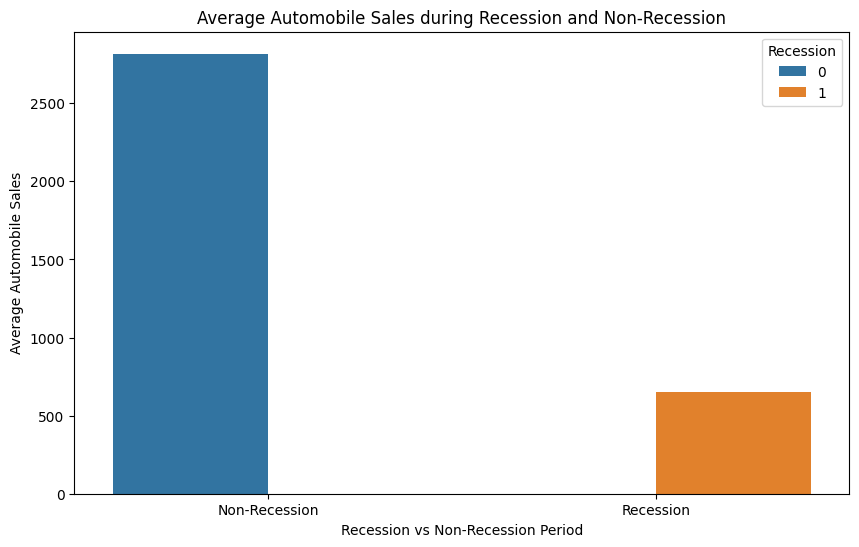

In [38]:
new_df = df.groupby('Recession')['Automobile_Sales'].mean().reset_index()

# Create the bar chart using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Recession', y='Automobile_Sales', hue='Recession',  data=new_df)
plt.xlabel('Recession vs Non-Recession Period')
plt.ylabel('Average Automobile Sales')
plt.title('Average Automobile Sales during Recession and Non-Recession')
plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'])
plt.show()

Now you want to compare the sales of different vehicle types during a recession and a non-recession period

We recommend that you use the functionality of Seaborn Library to create this visualization

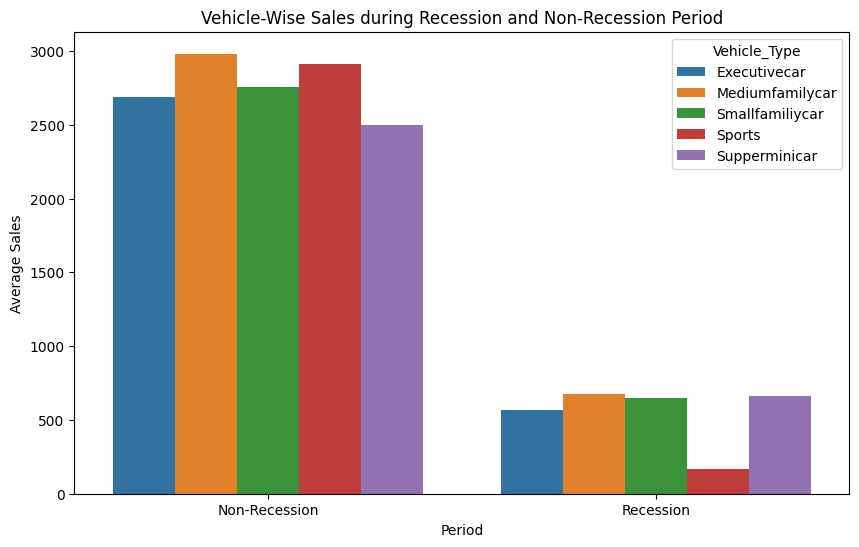

In [ ]:
# Filter the data for recessionary periods
recession_data = df[df['Recession'] == 1]

dd=df.groupby(['Recession','Vehicle_Type'])['Automobile_Sales'].mean().reset_index()

# Calculate the total sales volume by vehicle type during recessions
#sales_by_vehicle_type = recession_data.groupby('Vehicle_Type')['Automobile_Sales'].sum().reset_index()

# Create the grouped bar chart using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Recession', y='Automobile_Sales', hue='Vehicle_Type', data=dd)
plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'])
plt.xlabel('Period')
plt.ylabel('Average Sales')
plt.title('Vehicle-Wise Sales during Recession and Non-Recession Period')

plt.show()

From the above chart what insights have you gained on the overall sales of automobiles during recession?
Type your answer below:-


From this plot, we can understand that there is a drastic decline in the overall sales of the automobiles during recession.
However, the most affected type of vehicle is executivecar and sports

TASK 1.4: Use sub plotting to compare the variations in GDP during recession and non-recession period by developing line plots for each period.

Now, you want to find more insights from the data to understand the reason.
Plot a two line charts using subplotting to answer:-

How did the GDP vary over time during recession and non-recession periods?

Make use of add_subplot() from Matplotlib for this comparision.

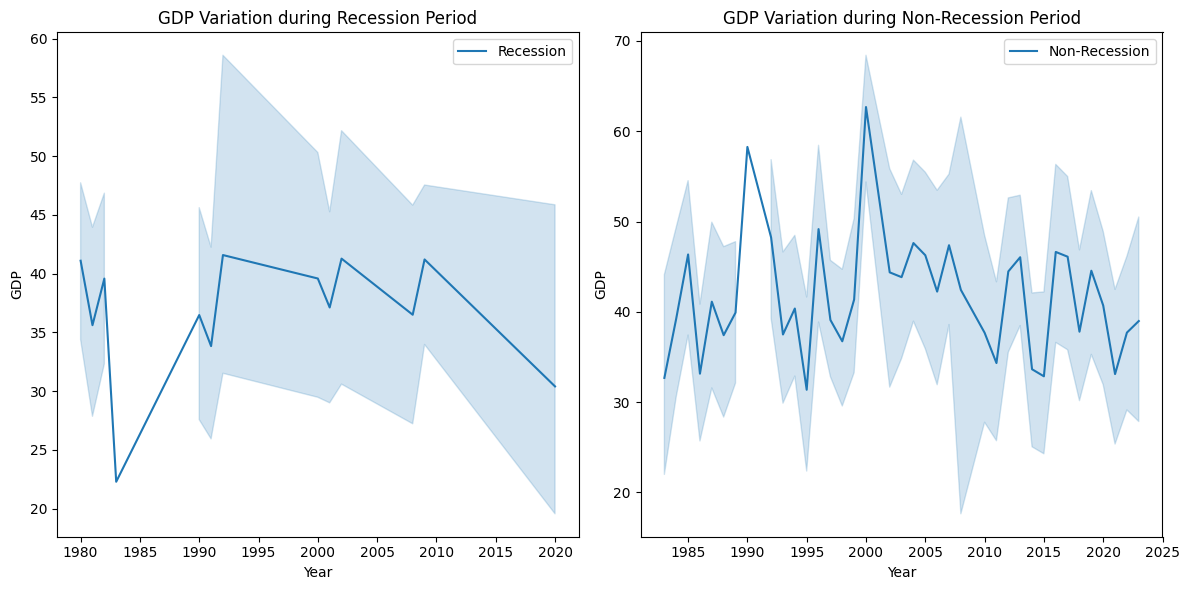

In [ ]:
#Create dataframes for recession and non-recession period
rec_data = df[df['Recession'] == 1]
non_rec_data = df[df['Recession'] == 0]

#Figure
fig=plt.figure(figsize=(12, 6))

#Create different axes for subploting
ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1,2,2) # add subplot 2 (1 row, 2 columns, second plot).

#plt.subplot(1, 2, 1)
sns.lineplot(x='Year', y='GDP', data=rec_data, label='Recession', ax=ax0)
ax0.set_xlabel('Year')
ax0.set_ylabel('GDP')
ax0.set_title('GDP Variation during Recession Period')

#plt.subplot(1, 2, 2)
sns.lineplot(x='Year', y='GDP', data=non_rec_data, label='Non-Recession',ax=ax1)
ax1.set_xlabel('Year')
ax1.set_ylabel('GDP')
ax1.set_title('GDP Variation during Non-Recession Period')

plt.tight_layout()
plt.show()

Inference
From this plot, it is evident that during recession, the GDP of the country was in a low range, might have afected the overall sales of the company

TASK 1.5: Develop a Bubble plot for displaying the impact of seasonality on Automobile Sales.

How has seasonality impacted the sales, in which months the sales were high or low? Check it for non-recession years to understand the trend

Develop a Bubble plot for displaying Automobile Sales for every month and use Seasonality Weight for representing the size of each bubble

Title this plot as 'Seasonality impact on Automobile Sales'

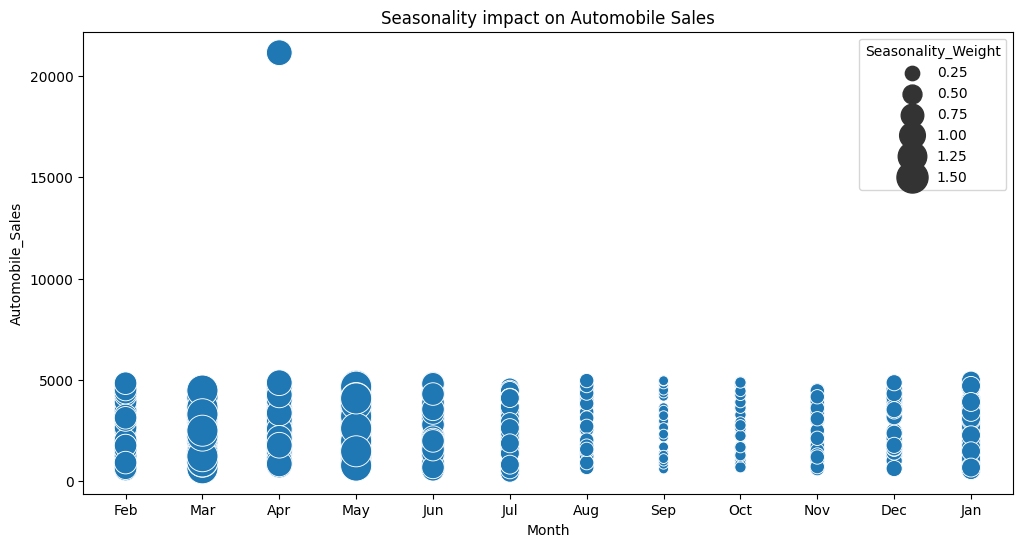

In [40]:
non_rec_data = df[df['Recession'] == 0]

size=non_rec_data['Seasonality_Weight'] #for bubble effect
plt.figure(figsize=(12,6))

sns.scatterplot(data=non_rec_data, x='Month', y='Automobile_Sales', size=size,sizes=(50,500))

#you can further include hue='Seasonality_Weight', legend=False)
plt.xlabel('Month')
plt.ylabel('Automobile_Sales')
plt.title('Seasonality impact on Automobile Sales')

plt.show()

Inference
From this plot, it is evident that seasonality has not affected on the overall sales. However, there is a drastic raise in sales in the month of April


TASK 1.6: Use the functionality of Matplotlib to develop a scatter plot to identify the correlation between average vehicle price relate to the sales volume during recessions.
From the data, develop a scatter plot to identify if there a correlation between consumer confidence and automobile sales during recession period?

Title this plot as 'Consumer Confidence and Automobile Sales during Recessions'

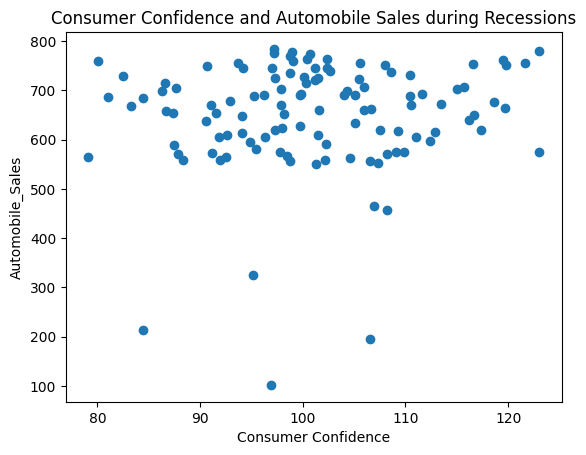

In [ ]:
#Create dataframes for recession and non-recession period
rec_data = df[df['Recession'] == 1]
plt.scatter(recession_data['Consumer_Confidence'], rec_data['Automobile_Sales'])

plt.xlabel('Consumer Confidence')
plt.ylabel('Automobile_Sales')
plt.title('Consumer Confidence and Automobile Sales during Recessions')
plt.show()

How does the average vehicle price relate to the sales volume during recessions?

Plot another scatter plot and title it as 'Relationship between Average Vehicle Price and Sales during Recessions'

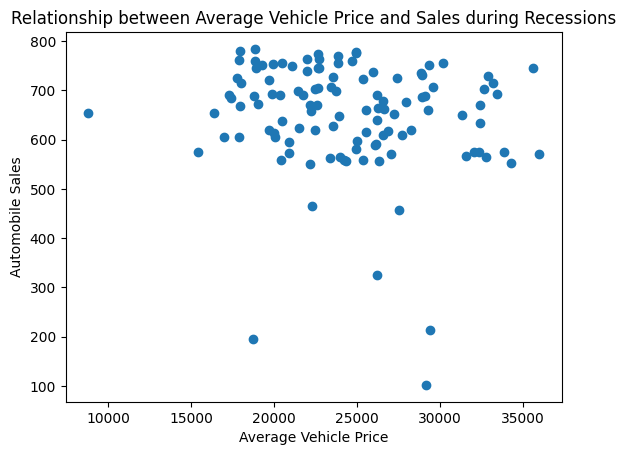

In [ ]:
#Create dataframes for recession and non-recession period
rec_data = df[df['Recession'] == 1]
plt.scatter(recession_data['Price'], rec_data['Automobile_Sales'])

plt.xlabel('Average Vehicle Price')
plt.ylabel('Automobile Sales')
plt.title('Relationship between Average Vehicle Price and Sales during Recessions')
plt.show()

Inference
There is not much relation!

TASK 1.7: Create a pie chart to display the portion of advertising expenditure of XYZAutomotives during recession and non-recession periods.

How did the advertising expenditure of XYZAutomotives change during recession and non-recession periods?

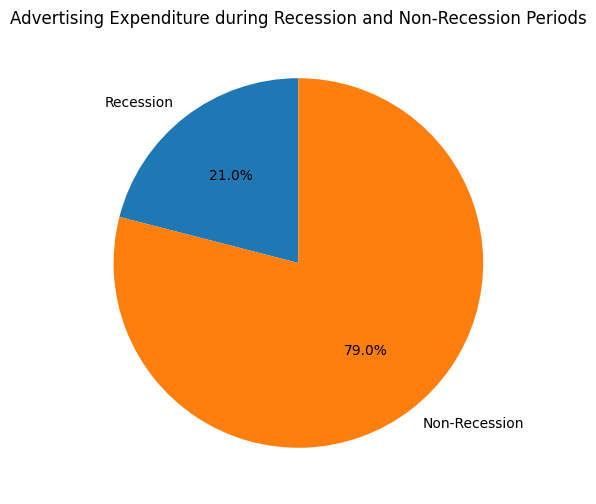

In [ ]:
# Filter the data
Rdata = df[df['Recession'] == 1]
NRdata = df[df['Recession'] == 0]

# Calculate the total advertising expenditure for both periods
RAtotal = Rdata['Advertising_Expenditure'].sum()
NRtotal = NRdata['Advertising_Expenditure'].sum()

# Create a pie chart for the advertising expenditure
plt.figure(figsize=(8, 6))

labels = ['Recession', 'Non-Recession']
sizes = [RAtotal, NRtotal]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

plt.title('Advertising Expenditure during Recession and Non-Recession Periods')

plt.show()


From the above plot, what insights do you find on the advertisement expenditure during recession and non recession periods?
Type your answer below:-

**Inference**

It seems ABCAutomotives has been spending much more on the advertisements during non-recession periods as compared to during recession times. Fair enough!



TASK 1.8: Develop a pie chart to display the total Advertisement expenditure for each vehicle type during recession period.
Can we observe the share of each vehicle type in total sales during recessions?

Create another pie plot to display the total advertisement expenditure for each vehicle type

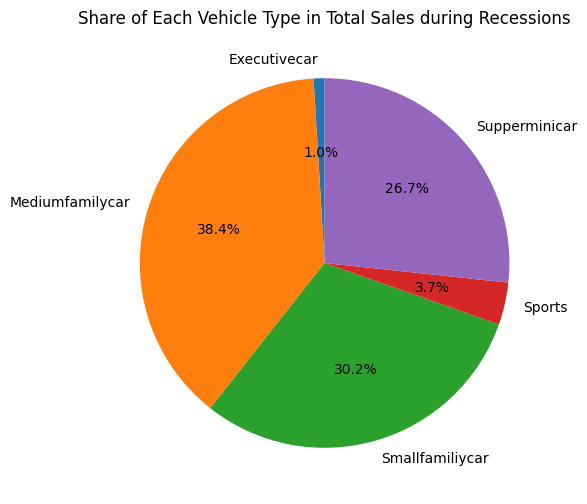

In [ ]:
# Filter the data
Rdata = df[df['Recession'] == 1]

# Calculate the sales volume by vehicle type during recessions
VTsales = Rdata.groupby('Vehicle_Type')['Advertising_Expenditure'].sum()

# Create a pie chart for the share of each vehicle type in total sales during recessions
plt.figure(figsize=(8, 6))

labels = VTsales.index
sizes = VTsales.values
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

plt.title('Share of Each Vehicle Type in Total Sales during Recessions')

plt.show()

**Inference**

During recession the advertisements were mostly focued on low price range vehicle. A wise decision!

TASK 1.9: Develop a countplot to analyse the effect of the unemployment rate on vehicle type and sales during the Recession Period.

Analyze the effect of the unemployment rate on vehicle type and sales during the Recession Period

You can create a countplot and title the plot as 'Effect of Unemployment Rate on Vehicle Type and Sales'

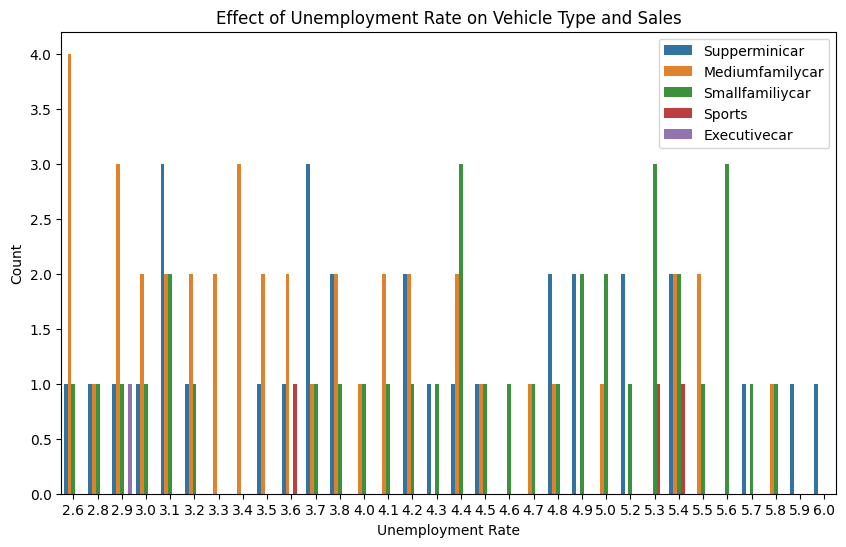

In [ ]:
data= df[df['Recession'] == 1]

plt.figure(figsize=(10, 6))

sns.countplot(data=data, x='unemployment_rate', hue='Vehicle_Type')

plt.xlabel('Unemployment Rate')
plt.ylabel('Count')
plt.title('Effect of Unemployment Rate on Vehicle Type and Sales')
plt.legend(loc='upper right')
plt.show()

From the above plot, what insights have you gained on the sales of superminicar, smallfamilycar, mediumminicar?
Type your answer below:-

**Inference**

During recession, buying pattern changed, the sales of low range vehicle like superminicar,smallfamilycar and Mediumminicar



OPTIONAL : TASK 1.10 Create a map on the hightest sales region/offices of the company during recession period

In [ ]:
# from pyodide.http import pyfetch

# async def download(url, filename):
#     response = await pyfetch(url)
#     if response.status == 200:
#         with open(filename, "wb") as f:
#             f.write(await response.bytes())

path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/us-states.json'
# await download(path, "us-states.json")

# filename = "us-states.json"

You found that the datset also contains the location/city for company offices. Now you want to show the recession impact on various offices/city sales by developing a choropleth

In [ ]:

# Filter the data for the recession period and specific cities
recession_data = data[data['Recession'] == 1]

# Calculate the total sales by city
sales_by_city = recession_data.groupby('City')['Automobile_Sales'].sum().reset_index()

# Create a base map centered on the United States
map1 = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

# Create a choropleth layer using Folium
choropleth = folium.Choropleth(
    geo_data= path,  # GeoJSON file with state boundaries
    data=sales_by_city,
    columns=['City', 'Automobile_Sales'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Automobile Sales during Recession'
).add_to(map1)


# Add tooltips to the choropleth layer
choropleth.geojson.add_child(
    folium.features.GeoJsonTooltip(['name'], labels=True)
)

# Display the map
map1

In [1]:
!pip install pandas dash

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 62.1 MB/s eta 0:00:00


Components of the report items
Yearly Automobile Sales Statistics

Yearly Average Automobile sales using line chart for the whole period.
For the chosen year provide,
Total Monthly Automobile sales using line chart.
Average Monthly Automobile sales of each vehicle type using bar chart.
Total Advertisement Expenditure for each vehicle using pie chart
Recession Period Statistics

Average Automobile sales using line chart for the Recession Period using line chart.
Average number of vehicles sold by vehicle type using bar chart
Total expenditure share by vehicle type during recession usssing pie chart
Effect of unemployment rate on vehicle type and sales using bar chart
NOTE: You have worked creating a dashboard components in Flight Delay Time Statistics Dashboard section. You will be working on the similar lines for this Dashboard

Dataset Variables for your reference
The dataset includes the following variables

Date: The date of the observation.
Recession: A binary variable indicating recession perion; 1 means it was recession, 0 means it was normal.
Automobile_Sales: The number of vehicles sold during the period.
GDP: The per capita GDP value in USD.
Unemployment_Rate: The monthly unemployment rate.
Consumer_Confidence: A synthetic index representing consumer confidence, which can impact consumer spending and automobile purchases.
Seasonality_Weight: The weight representing the seasonality effect on automobile sales during the period.
Price: The average vehicle price during the period.
Advertising_Expenditure: The advertising expenditure of the company.
Vehicle_Type: The type of vehicles sold; Supperminicar, Smallfamiliycar, Mediumfamilycar, Executivecar, Sports.
Competition: The measure of competition in the market, such as the number of competitors or market share of major manufacturers.
Month: Month of the observation extracted from Date.
Year: Year of the observation extracted from Date.

**Requirements to create the expected Dashboard**

Two dropdown menus: For choosing report type and year
Each dropdown will be designed in a division


The second dropdown (for selecting the year) should be enabled only if when the user selects “Yearly Statistics report” from the previous dropdown, else it should be disabled only. - The second dropdown (for selecting the year) should be enabled only if when the user selects “Yearly Statistics report” from the previous dropdown, else it should be disabled only.


Layout for adding graphs.
Callback functions to return to the layout and display graphs.
First callback will be required to take the input for the report type and set the years dropdown to be enabled to take the year input for “Years Statistics Report”, else this dropdown be put on disabled.
In the second callback you will fetch the value of report type and year and return the required graphs appropriately for each type of report
The four plots to be displayed in 2 rows, 2 column representation

In [2]:
# Import required libraries
import pandas as pd
import plotly.graph_objects as go
import dash
from dash import dcc
from dash import html
from dash.dependencies import Input, Output
import plotly.express as px

# Read the automobile data into pandas dataframe
data =  pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv')

# Initialize the Dash app
app = dash.Dash(__name__)

# Set the title of the dashboard
#app.title = "Automobile Statistics Dashboard"

#---------------------------------------------------------------------------------
# Create the dropdown menu options
dropdown_options = [
    {'label': 'Yearly Statistics', 'value': 'Yearly Statistics'},
    {'label': 'Recession Period Statistics', 'value': 'Recession Period Statistics'}
]

# List of years
year_list = [i for i in range(1980, 2024, 1)]
#---------------------------------------------------------------------------------------
# Create the layout of the app
app.layout = html.Div([
    #TASK 2.1 Add title to the dashboard
    # Title for the dashboard with the specified styles
    html.H1("Automobile Sales Statistics Dashboard",  #May include style for title
            style={'textAlign': 'center', 'color': '#503D36', 'font-size': '24px'}
    ),

    html.Div([#TASK 2.2: Add two dropdown menus
        html.Label("Select Statistics:"),
        dcc.Dropdown(
            id='dropdown-statistics',
            options=[
                {'label': 'Yearly Statistics', 'value': 'Yearly Statistics'},
                {'label': 'Recession Period Statistics', 'value': 'Recession Period Statistics'}
            ],
            placeholder='Select a report type',
            value='Select Statistics',
            style={'width': '80%', 'padding': '3px', 'fontSize': '20px', 'textAlignLast': 'center'}
        )
    ]),


    # Dropdown for year selection
    html.Div([
        dcc.Dropdown(
            id='select-year',
            options=[{'label': i, 'value': i} for i in year_list],
            placeholder='Select a year',
            style={'width': '80%', 'padding': '3px', 'fontSize': '20px', 'textAlignLast': 'center'}),
        html.Div([
            html.Div(id='output-container', className='chart-grid', style={'display': 'flex'}),
        ]),])
])



TASK 2.2: Add drop-down menus to your dashboard with appropriate titles and options
Create FIRST dropdown menu and add two Report options to it.
Below is the skeleton:

In [35]:
html.Div([#TASK 2.2: Add two dropdown menus
    html.Label("Select Statistics:"),
    dcc.Dropdown(
        id='dropdown-statistics',
        options=dropdown_options,
        value='Select Statistics',
        placeholder='Select a report type'
    )
]),
html.Div(dcc.Dropdown(
        id='select-year',
        options=[{'label': i, 'value': i} for i in year_list],
        value='select-year'
    ))

Div(Dropdown(options=[{'label': 1980, 'value': 1980}, {'label': 1981, 'value': 1981}, {'label': 1982, 'value': 1982}, {'label': 1983, 'value': 1983}, {'label': 1984, 'value': 1984}, {'label': 1985, 'value': 1985}, {'label': 1986, 'value': 1986}, {'label': 1987, 'value': 1987}, {'label': 1988, 'value': 1988}, {'label': 1989, 'value': 1989}, {'label': 1990, 'value': 1990}, {'label': 1991, 'value': 1991}, {'label': 1992, 'value': 1992}, {'label': 1993, 'value': 1993}, {'label': 1994, 'value': 1994}, {'label': 1995, 'value': 1995}, {'label': 1996, 'value': 1996}, {'label': 1997, 'value': 1997}, {'label': 1998, 'value': 1998}, {'label': 1999, 'value': 1999}, {'label': 2000, 'value': 2000}, {'label': 2001, 'value': 2001}, {'label': 2002, 'value': 2002}, {'label': 2003, 'value': 2003}, {'label': 2004, 'value': 2004}, {'label': 2005, 'value': 2005}, {'label': 2006, 'value': 2006}, {'label': 2007, 'value': 2007}, {'label': 2008, 'value': 2008}, {'label': 2009, 'value': 2009}, {'label': 2010, 'v

TASK 2.3: Add a division for output display with appropriate id and classname property
Add an inner division to display the output

Set id to output-container
className to chart-grid
style it to be displayed as a flex

In [3]:
html.Div(id='output-container', className='chart-grid', style={'display':'flex'})

Div(id='output-container', className='chart-grid', style={'display': 'flex'})

TASK 2.4: Creating Callbacks; Define the callback function to update the input container based on the selected statistics and the output container
We need two callbacks:-
1. To enable or disable the input container based on the selected statistics.The selected statistics here can be either Recession Statistics or Yearly Statistics.
2. To plot the output graphs for the respective report types.

Once the choice is made by the user, if it is yearly statistics, the input container shall get enabled else it will be in disabled state

This means the output component will be the select year,
while input component will be dropdown-statistics

and then we can make use of the if-else statement to return appropriate value to the component-property disabled.

TASK 2.5: Create and display graphs for Recession Report Statistics
You will be required to prepare the data as per the plot requirement (usually using groupby())


Then you need to Create a different plots using plotly.express.

In [4]:
#TASK 2.4: Creating Callbacks
# Define the callback function to update the input container based on the selected statistics
@app.callback(
    Output(component_id='select-year', component_property='disabled'),
    Input(component_id='dropdown-statistics', component_property='value')
)
def update_input_container(selected_statistics):
    if selected_statistics == 'Yearly Statistics':
        return True
    else:
        return False

#Callback for plotting
# Define the callback function to update the input container based on the selected statistics
@app.callback(
    Output(component_id='output-container', component_property='children'),
    [Input(component_id='dropdown-statistics', component_property='value'),
     Input(component_id='select-year', component_property='value')]
)
def update_output_container(selected_statistics, input_year):
    print("Selected Statistics:", selected_statistics)
    print("Selected Year:", input_year)

    if selected_statistics == 'Recession Period Statistics':
        # Filter the data for recession periods
        recession_data = data[data['Recession'] == 1]

        print("Recession Data:")
        print(recession_data.head())

#TASK 2.5: Create and display graphs for Recession Report Statistics

#Plot 1 Automobile sales fluctuate over Recession Period (year wise)
        # use groupby to create relevant data for plotting
        yearly_rec = recession_data.groupby('Year')['Automobile_Sales'].mean().reset_index()
        R_chart1 = dcc.Graph(
            figure=px.line(yearly_rec,
                        x='Year',
                        y='Automobile_Sales',
                        title="Automobile Sales Fluctuation Over Recession Period")
        )


#Plot 2 Calculate the average number of vehicles sold by vehicle type
        # use groupby to create relevant data for plotting
        average_sales = recession_data.groupby('Vehicle_Type')['Automobile_Sales'].mean().reset_index()
        R_chart2 = dcc.Graph(
            figure=px.bar(average_sales,
                        x='Vehicle_Type',
                        y='Automobile_Sales',
                        title="Average Vehicles Sold by Vehicle Type During Recession")
        )


# Plot 3 Pie chart for total expenditure share by vehicle type during recessions
        # use groupby to create relevant data for plotting
        exp_rec = recession_data.groupby('Vehicle_Type')['Advertising_Expenditure'].sum().reset_index()
        R_chart3 = dcc.Graph(
            figure=px.pie(exp_rec,
                        values='Advertising_Expenditure',
                        names='Vehicle_Type',
                        title="Expenditure Share by Vehicle Type During Recession")
        )


# Plot 4 bar chart for the effect of unemployment rate on vehicle type and sales
        unemployment_data = recession_data.groupby('Vehicle_Type')['Unemployment_Rate'].mean().reset_index()
        R_chart4 = dcc.Graph(
            figure=px.bar(unemployment_data,
                        x='Vehicle_Type',
                        y='Unemployment_Rate',
                        title="Effect of Unemployment Rate on Vehicle Type During Recession")
        )



        return [
            html.Div(className='chart-item', children=[html.Div(children=R_chart1), html.Div(children=R_chart2)]),
            html.Div(className='chart-item', children=[html.Div(children=R_chart3), html.Div(children=R_chart4)])
        ]


# TASK 2.6: Create and display graphs for Yearly Report Statistics
 # Yearly Statistic Report Plots
    elif (input_year and selected_statistics == 'Yearly Statistics') :
        yearly_data = data[data['Year'] == input_year]

#TASK 2.5: Creating Graphs Yearly data

#plot 1 Yearly Automobile sales using line chart for the whole period.
        yas = data.groupby('Year')['Automobile_Sales'].mean().reset_index()
        Y_chart1 = dcc.Graph(
            figure=px.line(yas,
                        x='Year',
                        y='Automobile_Sales',
                        title="Yearly Automobile Sales Over Time")
        )


# Plot 2 Total Monthly Automobile sales using line chart.
        monthly_sales = yearly_data.groupby('Month')['Automobile_Sales'].sum().reset_index()
        Y_chart2 = dcc.Graph(
            figure=px.line(monthly_sales,
                        x='Month',
                        y='Automobile_Sales',
                        title="Total Monthly Automobile Sales for the Year {}".format(input_year))
        )

            # Plot bar chart for average number of vehicles sold during the given year
        avr_vdata = yearly_data.groupby('Vehicle_Type')['Automobile_Sales'].mean().reset_index()
        Y_chart3 = dcc.Graph(
            figure=px.bar(avr_vdata,
                        x='Vehicle_Type',
                        y='Automobile_Sales',
                        title="Average Vehicles Sold by Vehicle Type in the year {}".format(input_year))
        )

            # Total Advertisement Expenditure for each vehicle using pie chart
        exp_data = yearly_data.groupby('Vehicle_Type')['Advertising_Expenditure'].sum().reset_index()
        Y_chart4 = dcc.Graph(
            figure=px.pie(exp_data,
                        values='Advertising_Expenditure',
                        names='Vehicle_Type',
                        title="Advertisement Expenditure by Vehicle Type for the Year {}".format(input_year))
        )
        #TASK 2.6: Returning the graphs for displaying Yearly data
        return [
            html.Div(className='chart-item', children=[html.Div(children=Y_chart1), html.Div(children=Y_chart2)], style={'display': 'flex'}),
            html.Div(className='chart-item', children=[html.Div(children=Y_chart3), html.Div(children=Y_chart4)], style={'display': 'flex'})
        ]


    else:
        return None

# Run the Dash app
if __name__ == '__main__':
    app.run_server(debug=True)




<IPython.core.display.Javascript object>

TASK 2.6: Create and display graphs for Yearly Report Statistics